# Assignment-1 (Linear Regression)

## Import Libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error, r2_score

from sklearn.feature_selection import SelectKBest, f_regression
pd.options.display.float_format = '{:.2f}'.format


## Load the dataset

In [2]:
car_data = pd.read_csv('used_car_prices_dataset_final.csv')

In [3]:
car_data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89


## Understand the Data

In [4]:
car_data.columns

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')

In [5]:
car_data.dtypes

CarAge            int64
Mileage         float64
Brand            object
FuelType         object
Transmission     object
OwnerCount      float64
EngineSize      float64
Horsepower      float64
CarCondition     object
ResalePrice     float64
dtype: object

In [6]:
car_data.shape

(4666, 10)

In [7]:
car_data.info

<bound method DataFrame.info of       CarAge  Mileage     Brand  FuelType Transmission  OwnerCount  \
0         15 70539.73     Honda  Electric       Manual        3.00   
1         11 72118.01     Honda  Electric    Automatic        4.00   
2          8 38721.05      Ford    Hybrid       Manual        2.00   
3          7 33675.66       Kia    Petrol    Automatic        3.00   
4         19 51562.86  Mercedes    Petrol    Automatic        4.00   
...      ...      ...       ...       ...          ...         ...   
4661       4 22710.58      Audi    Hybrid       Manual        2.00   
4662       4 66193.15   Hyundai    Diesel    Automatic        4.00   
4663       1 54614.23      Ford  Electric    Automatic        2.00   
4664       7 52035.77    Toyota    Hybrid       Manual        4.00   
4665      18 56126.95    Toyota    Petrol       Manual        1.00   

      EngineSize  Horsepower CarCondition  ResalePrice  
0           1.86      116.78         Poor     37380.23  
1           2

In [8]:
car_data.describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4666.00,4666.00,4533.00,4666.00,4666.00,4666.00
mean,10.27,51426.43,2.48,2.04,149.85,52181.77
std,5.94,24202.42,1.14,0.58,39.99,12106.95
min,1.00,-26733.11,1.00,-0.24,-28.62,-599.85
25%,5.00,36405.52,1.00,1.67,122.89,44039.24
50%,10.00,49959.17,2.00,2.02,149.58,52222.64
75%,15.00,64324.46,4.00,2.36,176.63,60278.03
max,30.00,150000.00,4.00,5.00,291.70,94400.29


In [9]:
# Row Duplication
car_data.duplicated().sum()

0

In [10]:
car_data.isnull().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [11]:
car_data.isnull().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

<Axes: >

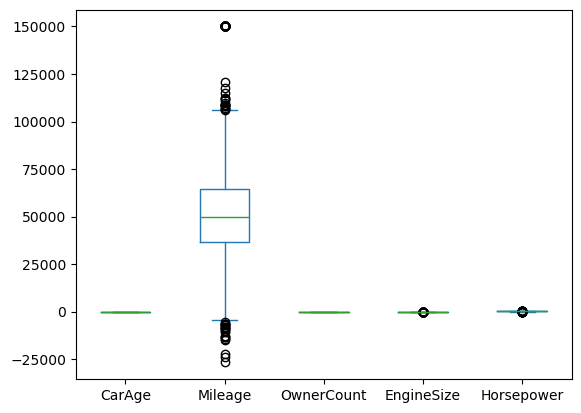

In [12]:
car_data.drop(columns = ['ResalePrice']).plot(kind = 'box')

CarAge           Axes(0.125,0.53;0.227941x0.35)
Mileage       Axes(0.398529,0.53;0.227941x0.35)
OwnerCount    Axes(0.672059,0.53;0.227941x0.35)
EngineSize       Axes(0.125,0.11;0.227941x0.35)
Horsepower    Axes(0.398529,0.11;0.227941x0.35)
dtype: object

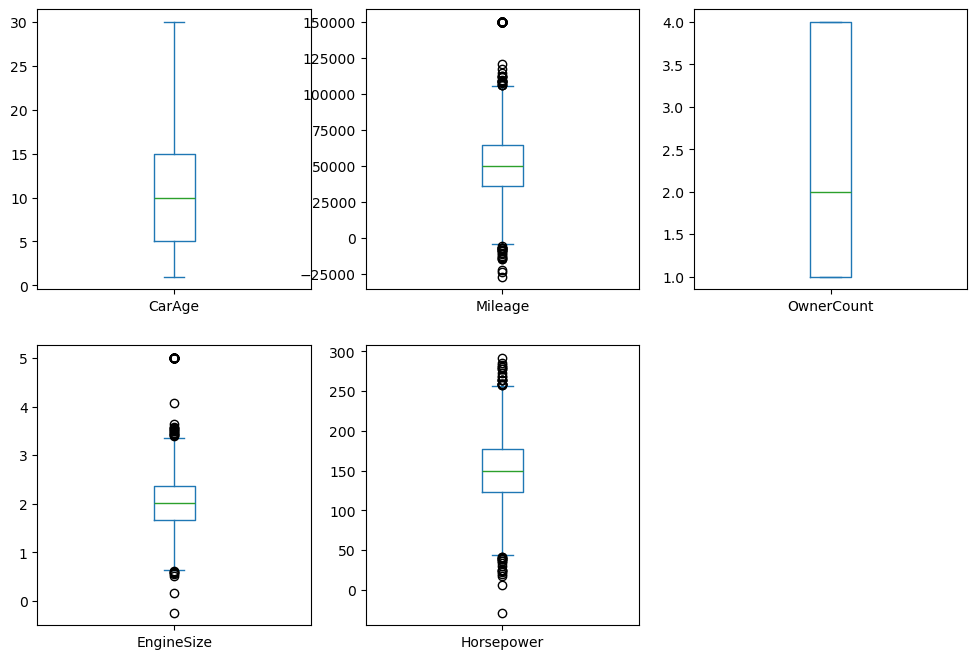

In [13]:
car_data.drop(columns = ['ResalePrice']).plot(kind = 'box', subplots = True, layout=(2, 3), figsize=(12,8))

CarAge


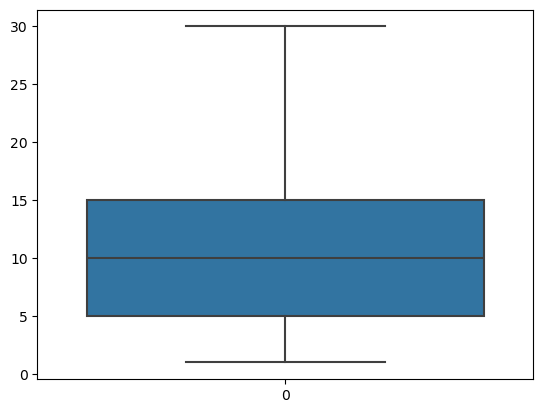

Mileage


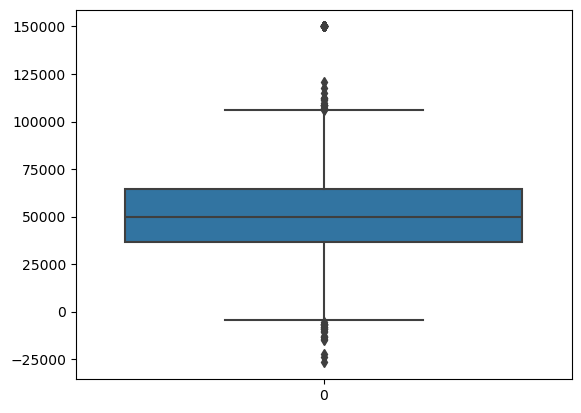

OwnerCount


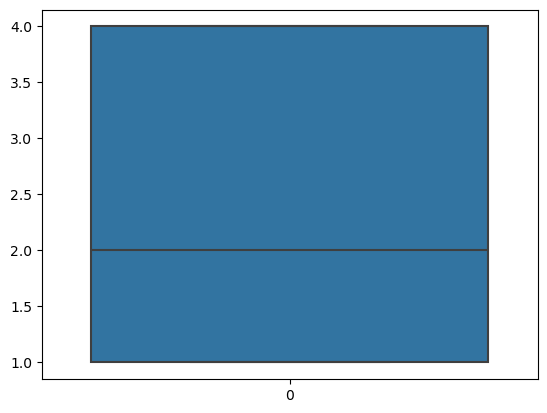

EngineSize


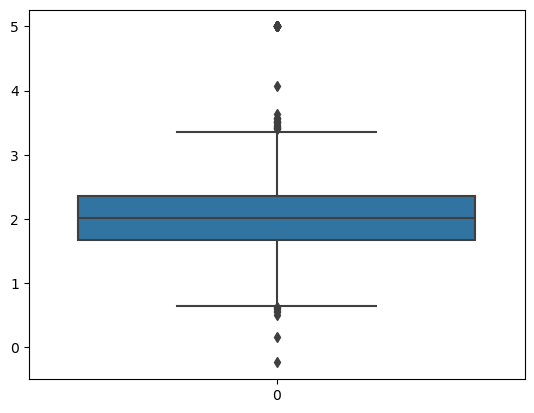

Horsepower


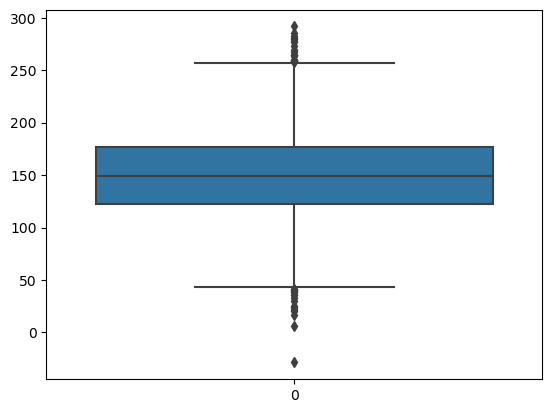

ResalePrice


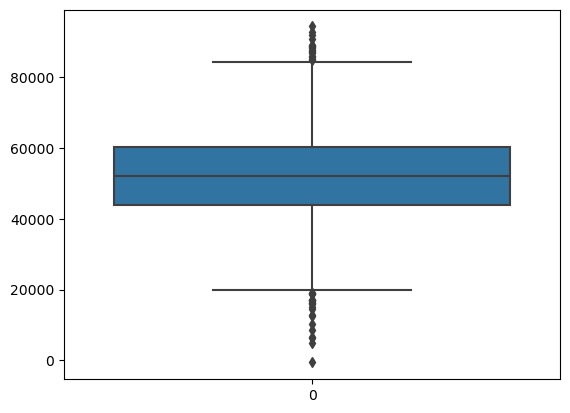

In [14]:
num_col = car_data.select_dtypes(include = 'number').columns

for col in num_col:
    print(col)
    sns.boxplot(car_data[col])
    plt.show()

In [15]:
car_data.head()

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51


<Axes: >

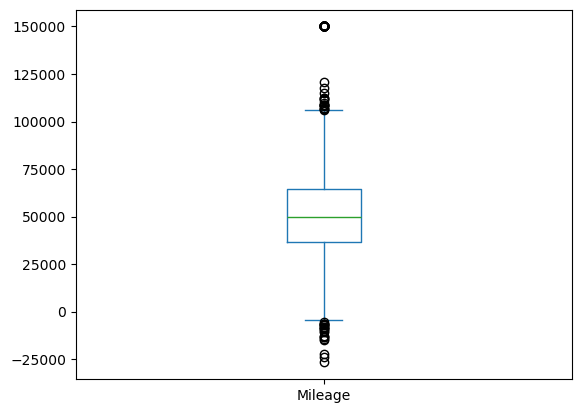

In [16]:
car_data['Mileage'].plot(kind = 'box')

<Axes: >

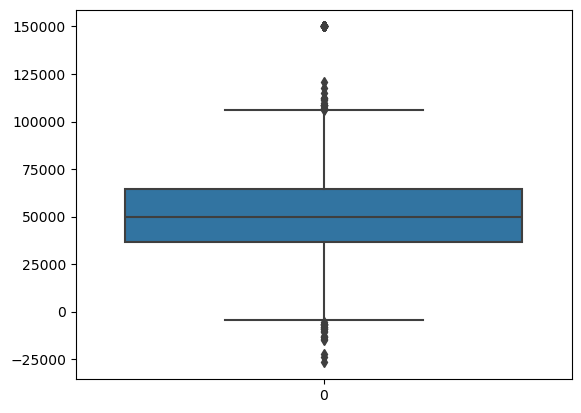

In [17]:
sns.boxplot(car_data['Mileage'])

In [18]:
car_data[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.00,0.06,0.03,0.03,0.01,-0.48
Mileage,0.06,1.00,0.01,0.06,-0.00,-0.21
OwnerCount,0.03,0.01,1.00,-0.01,0.02,0.01
EngineSize,0.03,0.06,-0.01,1.00,-0.01,0.20
Horsepower,0.01,-0.00,0.02,-0.01,1.00,0.65
ResalePrice,-0.48,-0.21,0.01,0.20,0.65,1.00


<Axes: >

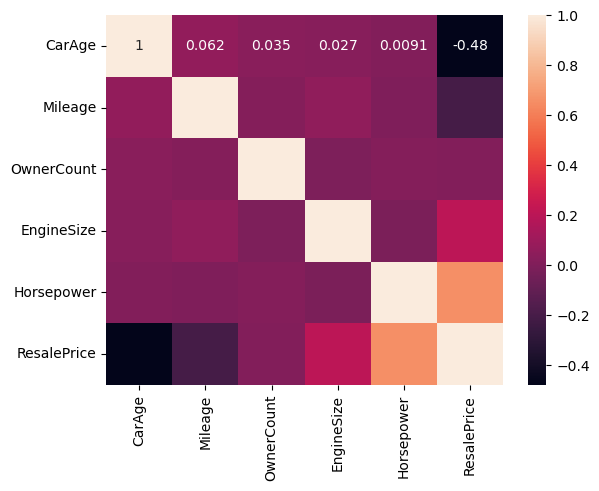

In [19]:
sns.heatmap(car_data[num_col].corr(), annot = True)

In [20]:
# EDA

<Axes: >

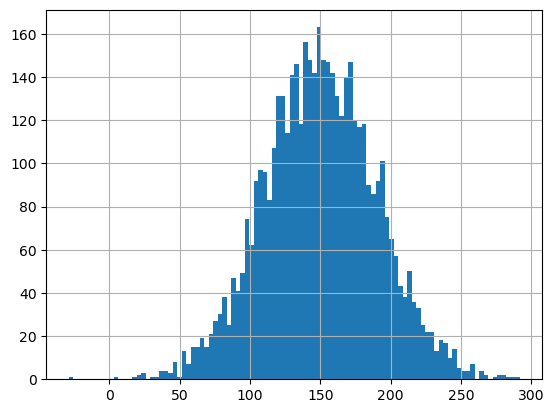

In [21]:
car_data['Horsepower'].hist(bins = 100)

<Axes: >

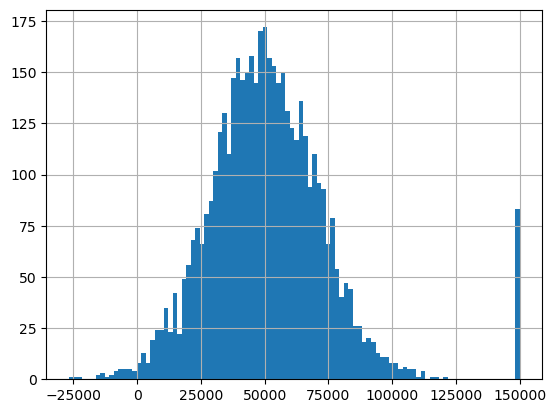

In [22]:
car_data['Mileage'].hist(bins = 100)

<Axes: >

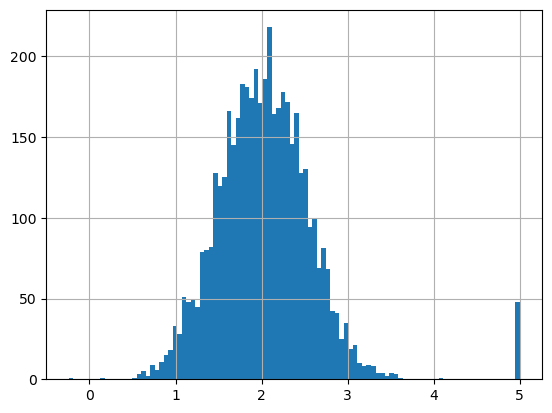

In [23]:
car_data['EngineSize'].hist(bins = 100)

C:\Users\Knx3\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Knx3\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Knx3\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Knx3\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

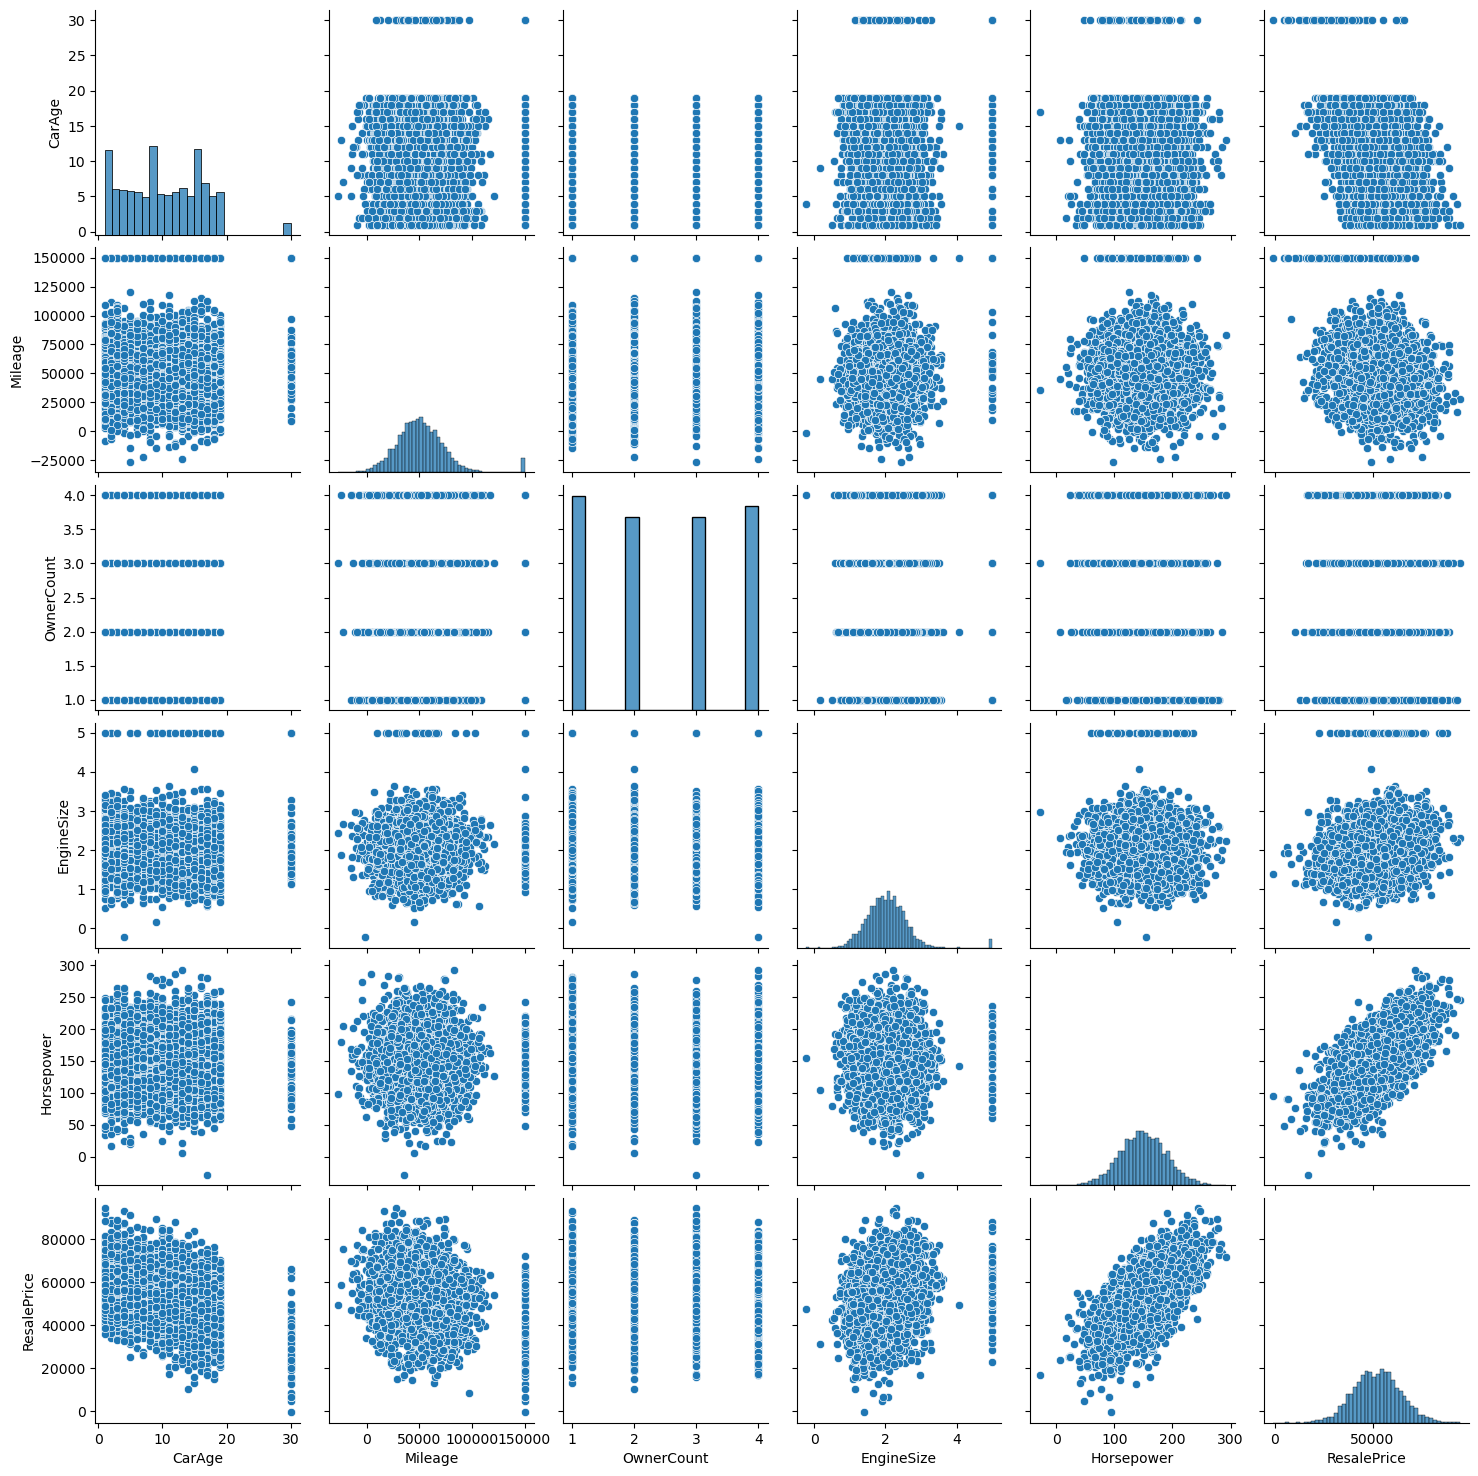

In [24]:
# Bivariate
sns.pairplot(car_data[num_col])

In [25]:
car_data['Mileage'].value_counts()

Mileage
150000.00    83
42138.20      1
61365.47      1
67196.67      1
84891.68      1
             ..
64187.05      1
50389.17      1
47229.76      1
41522.20      1
56126.95      1
Name: count, Length: 4584, dtype: int64

In [26]:
car_data['EngineSize'].value_counts()

EngineSize
5.00    48
1.86     1
2.15     1
2.48     1
0.62     1
        ..
1.96     1
1.80     1
2.82     1
2.36     1
0.99     1
Name: count, Length: 4619, dtype: int64

In [27]:
car_data.groupby('Mileage').ResalePrice.mean()

Mileage
-26733.11   49262.04
-23767.31   58765.61
-22021.70   75456.90
-14830.28   69656.38
-14420.33   46995.11
              ...   
112353.62   54140.43
114861.86   48820.12
117547.66   63292.56
120581.10   54029.40
150000.00   38565.19
Name: ResalePrice, Length: 4584, dtype: float64

In [28]:
car_data.groupby('EngineSize').ResalePrice.mean()

EngineSize
-0.24   47693.54
0.16    31288.42
0.51    42406.35
0.55    43135.40
0.57    38667.01
          ...   
3.57    61176.53
3.57    58149.28
3.63    61399.30
4.07    49103.22
5.00    57067.23
Name: ResalePrice, Length: 4619, dtype: float64

In [29]:
car_data.groupby(['CarAge', 'Mileage','EngineSize', 'Horsepower']).ResalePrice.mean().to_csv('result.csv')

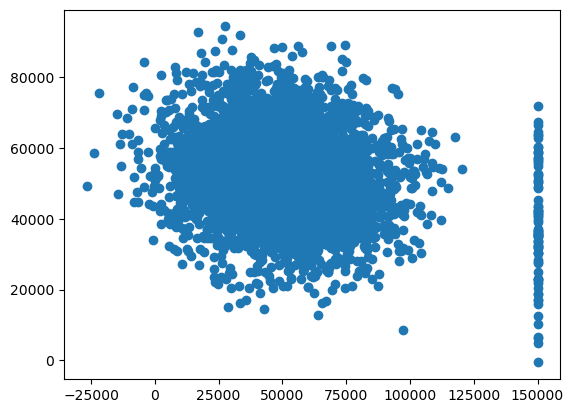

In [30]:
plt.scatter(car_data['Mileage'], car_data['ResalePrice'])


<Axes: xlabel='ResalePrice', ylabel='ResalePrice'>

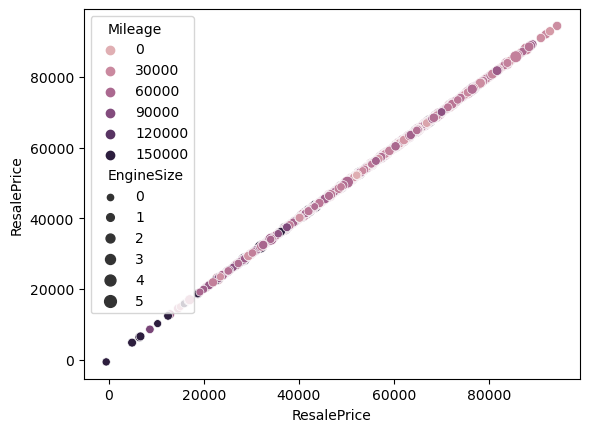

In [31]:
sns.scatterplot(x = car_data['ResalePrice'], y = car_data['ResalePrice'], hue = car_data['Mileage'], size = car_data['EngineSize'])

# Pre-Processing

In [32]:
car_data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [33]:
car_data.head()

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51


In [34]:
car_data.shape

(4666, 10)

In [35]:
car_data['Mileage'].mode()[0]

150000.0

In [36]:
car_data['Mileage'].mean()

51426.427842707984

In [37]:
# Handling Missing Values
car_data['OwnerCount'].fillna(car_data['OwnerCount'].median(), inplace = True)
car_data['Mileage'].fillna(car_data['Mileage'].median(), inplace = True)
car_data['Horsepower'].fillna(car_data['Horsepower'].median(), inplace = True)

In [38]:
car_data.isna().sum()

CarAge          0
Mileage         0
Brand           0
FuelType        0
Transmission    0
OwnerCount      0
EngineSize      0
Horsepower      0
CarCondition    0
ResalePrice     0
dtype: int64

In [39]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4666 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [40]:
car_data[car_data['ResalePrice']>9000]

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89


C:\Users\Knx3\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Knx3\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Knx3\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Knx3\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

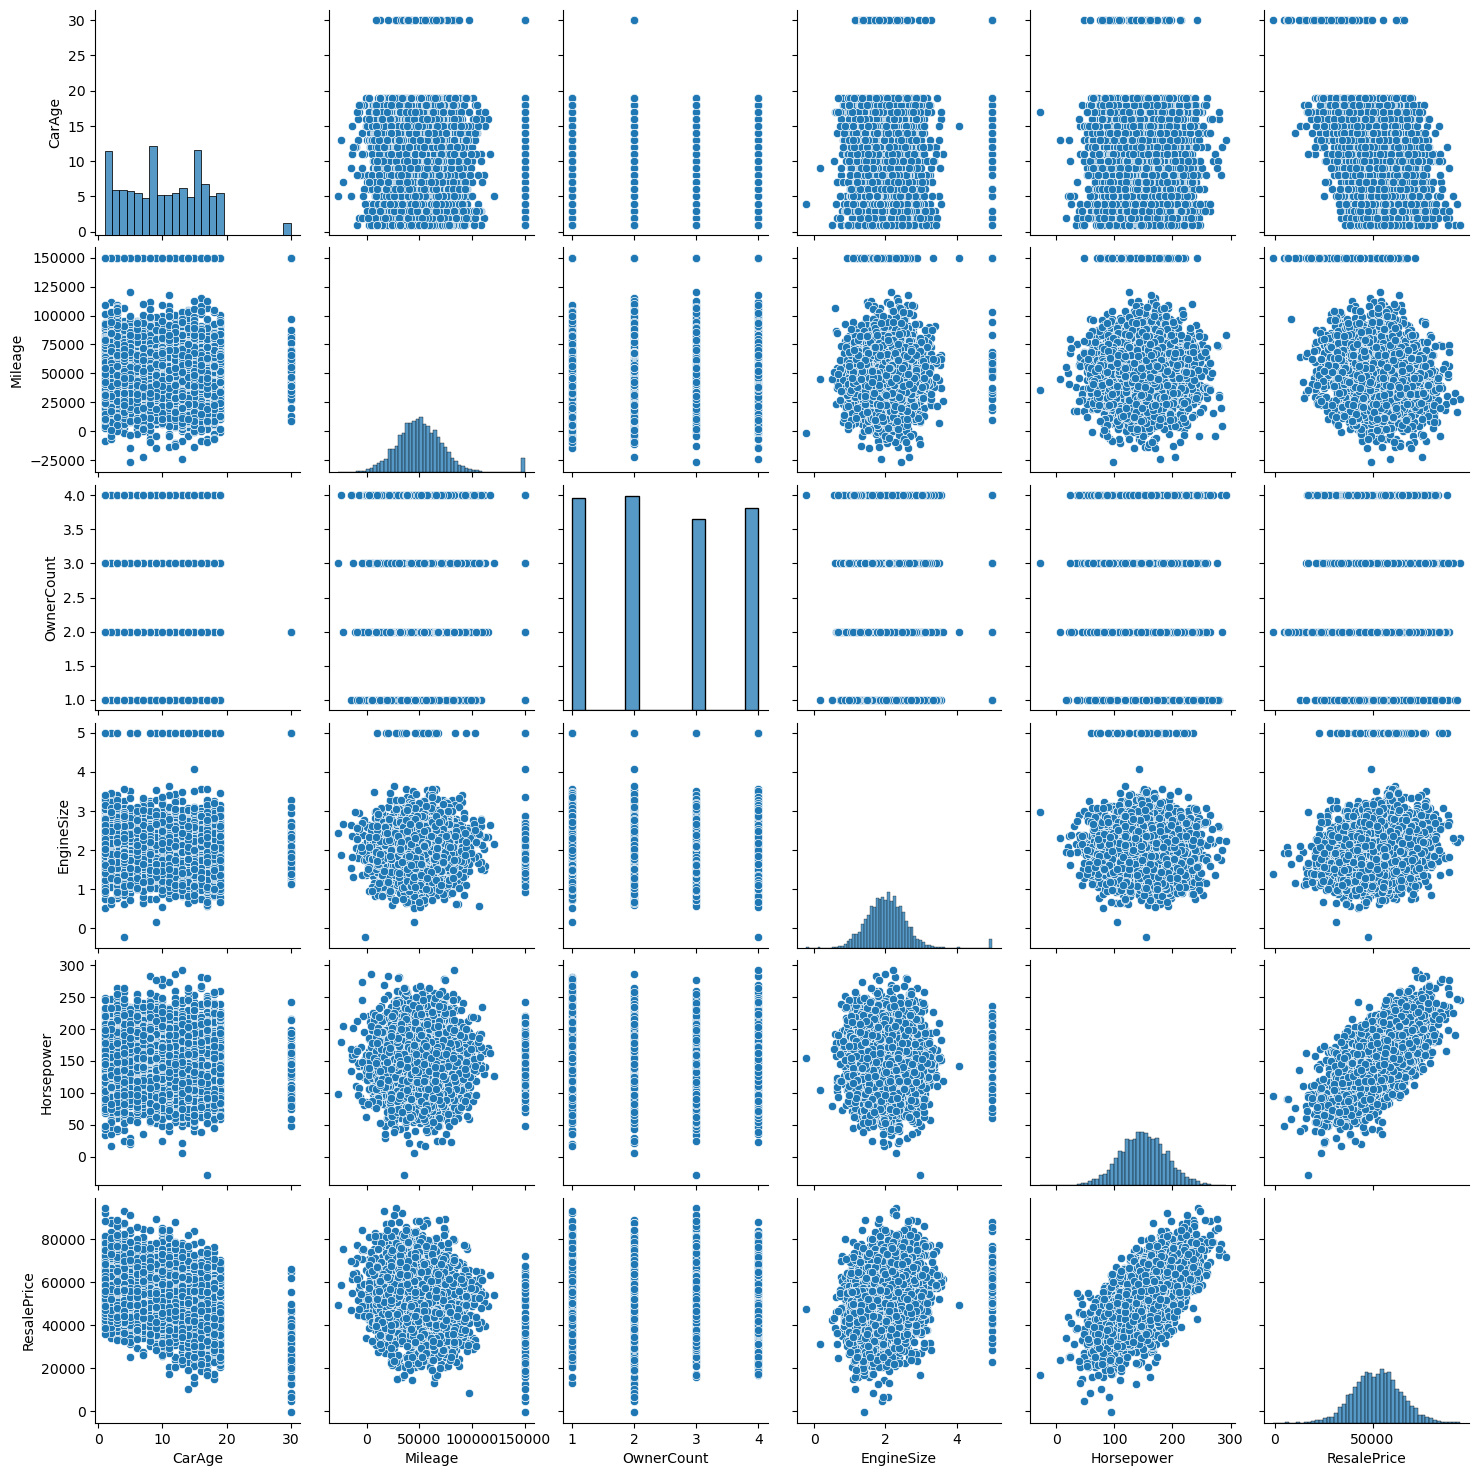

In [41]:
sns.pairplot(car_data)

In [42]:
# identify numerical columns
num_col = car_data.select_dtypes(include ='number').columns

In [43]:
car_data[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.00,0.06,0.01,0.03,0.01,-0.48
Mileage,0.06,1.00,0.01,0.06,-0.00,-0.21
OwnerCount,0.01,0.01,1.00,-0.01,0.02,0.02
EngineSize,0.03,0.06,-0.01,1.00,-0.01,0.20
Horsepower,0.01,-0.00,0.02,-0.01,1.00,0.65
ResalePrice,-0.48,-0.21,0.02,0.20,0.65,1.00


In [44]:
car_data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89


In [45]:
# Calculate the IQR for each column
Q1 = car_data[num_col].quantile(0.25)
Q3 = car_data[num_col].quantile(0.75)
IQR = Q3 - Q1

In [46]:
# Remove outliers
car_data = car_data[~((car_data[num_col] < (Q1 - 1.5*IQR)) | (car_data[num_col]>(Q3+1.5*IQR))).any(axis=1)]

In [47]:
car_data.shape

(4430, 10)

In [48]:
print(car_data.columns)

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')


In [49]:
# Encoding Categorical Variables
car_data = pd.get_dummies(car_data, columns=['Brand','FuelType','Transmission','CarCondition'],drop_first=True)

In [50]:
car_data

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol,Transmission_Manual,CarCondition_Fair,CarCondition_Good,CarCondition_Poor
0,15,70539.73,3.00,1.86,116.78,37380.23,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,11,72118.01,4.00,2.46,150.06,58279.18,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
2,8,38721.05,2.00,1.67,140.58,52420.52,False,True,False,False,...,False,False,False,False,True,False,True,True,False,False
3,7,33675.66,3.00,2.80,157.02,54195.80,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,19,51562.86,4.00,2.42,196.91,57287.51,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,2.00,1.84,170.18,56808.96,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
4662,4,66193.15,4.00,1.84,162.18,56224.63,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4663,1,54614.23,2.00,2.48,178.08,68440.02,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4664,7,52035.77,4.00,1.63,191.21,64847.89,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False


In [51]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4430 entries, 0 to 4665
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CarAge               4430 non-null   int64  
 1   Mileage              4430 non-null   float64
 2   OwnerCount           4430 non-null   float64
 3   EngineSize           4430 non-null   float64
 4   Horsepower           4430 non-null   float64
 5   ResalePrice          4430 non-null   float64
 6   Brand_BMW            4430 non-null   bool   
 7   Brand_Ford           4430 non-null   bool   
 8   Brand_Honda          4430 non-null   bool   
 9   Brand_Hyundai        4430 non-null   bool   
 10  Brand_Kia            4430 non-null   bool   
 11  Brand_Mercedes       4430 non-null   bool   
 12  Brand_Nissan         4430 non-null   bool   
 13  Brand_Toyota         4430 non-null   bool   
 14  FuelType_Electric    4430 non-null   bool   
 15  FuelType_Hybrid      4430 non-null   bool  

## Scaling

In [52]:
scaling = StandardScaler()

In [53]:
X =car_data.drop(columns='ResalePrice')

In [54]:
X.columns

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Kia',
       'Brand_Mercedes', 'Brand_Nissan', 'Brand_Toyota', 'FuelType_Electric',
       'FuelType_Hybrid', 'FuelType_Petrol', 'Transmission_Manual',
       'CarCondition_Fair', 'CarCondition_Good', 'CarCondition_Poor'],
      dtype='object')

In [55]:
scaled_features = X.columns

In [56]:
car_data[scaled_features] = scaling.fit_transform(car_data[scaled_features])

In [57]:
car_data

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol,Transmission_Manual,CarCondition_Fair,CarCondition_Good,CarCondition_Poor
0,0.84,1.06,0.47,-0.30,-0.86,37380.23,-0.36,-0.36,2.87,-0.35,...,-0.35,-0.34,-0.36,1.76,-0.58,-0.57,0.99,-0.59,-0.57,1.75
1,0.15,1.14,1.36,0.95,0.01,58279.18,-0.36,-0.36,2.87,-0.35,...,-0.35,-0.34,-0.36,1.76,-0.58,-0.57,-1.01,1.70,-0.57,-0.57
2,-0.37,-0.56,-0.42,-0.70,-0.24,52420.52,-0.36,2.74,-0.35,-0.35,...,-0.35,-0.34,-0.36,-0.57,1.73,-0.57,0.99,1.70,-0.57,-0.57
3,-0.55,-0.82,0.47,1.65,0.19,54195.80,-0.36,-0.36,-0.35,-0.35,...,-0.35,-0.34,-0.36,-0.57,-0.58,1.77,-1.01,-0.59,-0.57,1.75
4,1.53,0.09,1.36,0.87,1.23,57287.51,-0.36,-0.36,-0.35,-0.35,...,2.83,-0.34,-0.36,-0.57,-0.58,1.77,-1.01,1.70,-0.57,-0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,-1.07,-1.37,-0.42,-0.34,0.53,56808.96,-0.36,-0.36,-0.35,-0.35,...,-0.35,-0.34,-0.36,-0.57,1.73,-0.57,0.99,1.70,-0.57,-0.57
4662,-1.07,0.84,1.36,-0.34,0.32,56224.63,-0.36,-0.36,-0.35,2.82,...,-0.35,-0.34,-0.36,-0.57,-0.58,-0.57,-1.01,-0.59,-0.57,1.75
4663,-1.59,0.25,-0.42,0.98,0.74,68440.02,-0.36,2.74,-0.35,-0.35,...,-0.35,-0.34,-0.36,1.76,-0.58,-0.57,-1.01,-0.59,-0.57,-0.57
4664,-0.55,0.12,1.36,-0.77,1.08,64847.89,-0.36,-0.36,-0.35,-0.35,...,-0.35,-0.34,2.81,-0.57,1.73,-0.57,0.99,-0.59,-0.57,-0.57


In [58]:
car_data.corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,...,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol,Transmission_Manual,CarCondition_Fair,CarCondition_Good,CarCondition_Poor
CarAge,1.00,0.02,0.02,-0.02,0.02,-0.48,-0.02,0.01,0.03,0.01,...,-0.02,0.01,0.01,-0.02,-0.00,0.02,-0.00,-0.03,0.02,-0.02
Mileage,0.02,1.00,-0.00,0.01,0.02,-0.16,-0.01,0.02,0.01,0.01,...,0.01,-0.02,-0.00,0.02,-0.02,0.00,-0.00,-0.02,0.00,-0.00
OwnerCount,0.02,-0.00,1.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,...,0.01,-0.00,-0.01,-0.00,0.01,0.01,-0.01,-0.02,0.01,-0.01
EngineSize,-0.02,0.01,0.00,1.00,-0.02,0.20,-0.01,-0.01,-0.02,0.00,...,0.00,0.02,-0.01,0.01,-0.00,-0.01,-0.00,0.01,-0.01,-0.01
Horsepower,0.02,0.02,0.02,-0.02,1.00,0.64,0.01,0.02,0.01,0.01,...,-0.02,-0.03,-0.01,-0.01,-0.00,0.02,0.01,0.02,-0.00,-0.01
ResalePrice,-0.48,-0.16,0.02,0.20,0.64,1.00,0.01,0.01,-0.02,-0.01,...,-0.01,-0.01,-0.02,-0.00,0.00,-0.00,-0.00,-0.05,0.01,-0.08
Brand_BMW,-0.02,-0.01,0.00,-0.01,0.01,0.01,1.00,-0.13,-0.12,-0.13,...,-0.13,-0.12,-0.13,0.01,0.00,-0.00,-0.01,0.01,-0.02,0.01
Brand_Ford,0.01,0.02,0.00,-0.01,0.02,0.01,-0.13,1.00,-0.13,-0.13,...,-0.13,-0.12,-0.13,-0.01,0.00,-0.00,0.00,0.02,0.01,-0.01
Brand_Honda,0.03,0.01,0.00,-0.02,0.01,-0.02,-0.12,-0.13,1.00,-0.12,...,-0.12,-0.12,-0.12,0.00,-0.01,0.01,0.01,0.01,-0.02,-0.02
Brand_Hyundai,0.01,0.01,0.00,0.00,0.01,-0.01,-0.13,-0.13,-0.12,1.00,...,-0.13,-0.12,-0.13,0.01,-0.00,-0.01,-0.01,-0.00,-0.01,0.00


In [59]:
X = car_data.drop(columns = 'ResalePrice')
Y = car_data['ResalePrice']

## Data Split

In [60]:
# Split data into training and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

## Model

In [61]:
# Train the model
model = LinearRegression()

In [62]:
model.fit(X_train, Y_train)

LinearRegression()

In [63]:
model.coef_

array([-5621.71676018, -1859.9553167 ,   209.00038189,  2341.56304652,
        7553.78635785,    45.03876242,    77.45326686,   -30.06047898,
         -63.44177488,    60.40980358,    12.46127121,    75.08682251,
         -62.16780202,  -184.88229461,  -118.15579272,   -94.87676549,
         -59.7762188 , -1709.20699878,  -825.66989066, -1742.37577752])

<Axes: >

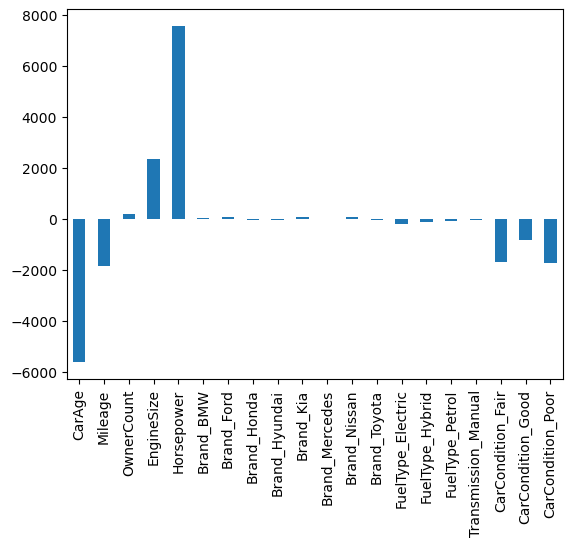

In [64]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [65]:
model.intercept_

52219.32961812547

## Prediction

In [66]:
# Make Predictions on the training and test datasets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

## Evaluation

In [67]:
# Define the Evaluation function
def evaluate(actual, pred, source):
    print(source)
    print('MSE')
    print(mean_squared_error(actual, pred))
    print('RMSE')
    print(np.sqrt(mean_squared_error(actual, pred)))
    print('MAPE')
    print(mean_absolute_percentage_error(actual, pred))
    print('R2 score')
    print(r2_score(actual, pred))
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), mean_absolute_percentage_error(actual, pred), r2_score(actual, pred)]

In [68]:
# Evaluate the model on training and test data
train_result = evaluate(Y_train, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(Y_test, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
33545280.34543352
RMSE
5791.828756570201
MAPE
0.0944777923921189
R2 score
0.7435223009382618
TEST DATA RESULT
MSE
32534265.943733197
RMSE
5703.881655831684
MAPE
0.09137669195531979
R2 score
0.7545415481641691


In [69]:
train_result

[33545280.34543352, 5791.828756570201, 0.0944777923921189, 0.7435223009382618]

In [70]:
test_result

[32534265.943733197,
 5703.881655831684,
 0.09137669195531979,
 0.7545415481641691]

In [71]:
res = [train_result] + [test_result]

In [72]:
res

[[33545280.34543352,
  5791.828756570201,
  0.0944777923921189,
  0.7435223009382618],
 [32534265.943733197,
  5703.881655831684,
  0.09137669195531979,
  0.7545415481641691]]

In [73]:
pd.DataFrame(res, columns = [ 'MSE','RMSE','MAPE','R2 Score'], index = ['Train', 'Test'])

,MSE,RMSE,MAPE,R2 Score
Train,33545280.35,5791.83,0.09,0.74
Test,32534265.94,5703.88,0.09,0.75


In [74]:
X.shape

(4430, 20)

## Feature Selection


In [75]:
select_k_best = SelectKBest(f_regression, k = 5)
X_select = select_k_best.fit_transform(X,Y)
select_k_best.get_support()

array([ True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [76]:
X.columns

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Kia',
       'Brand_Mercedes', 'Brand_Nissan', 'Brand_Toyota', 'FuelType_Electric',
       'FuelType_Hybrid', 'FuelType_Petrol', 'Transmission_Manual',
       'CarCondition_Fair', 'CarCondition_Good', 'CarCondition_Poor'],
      dtype='object')

In [77]:
selected_feature_names = X.columns[select_k_best.get_support()]

In [78]:
selected_feature_names

Index(['CarAge', 'Mileage', 'EngineSize', 'Horsepower', 'CarCondition_Poor'], dtype='object')

## Model after Feature Selection

In [79]:
X = X[selected_feature_names]


In [80]:
X = X[selected_feature_names]
y = car_data['ResalePrice']



## Data Split

In [81]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.2, random_state = 42)

## Model

In [82]:
train_X.shape

(3544, 5)

In [83]:
test_X.shape


(886, 5)

In [84]:
model = LinearRegression()

In [85]:
model.fit(train_X, train_Y)

LinearRegression()

In [86]:
model.coef_

array([-5571.34520712, -1814.57836925,  2349.98945563,  7529.6673881 ,
        -891.92662479])

<Axes: >

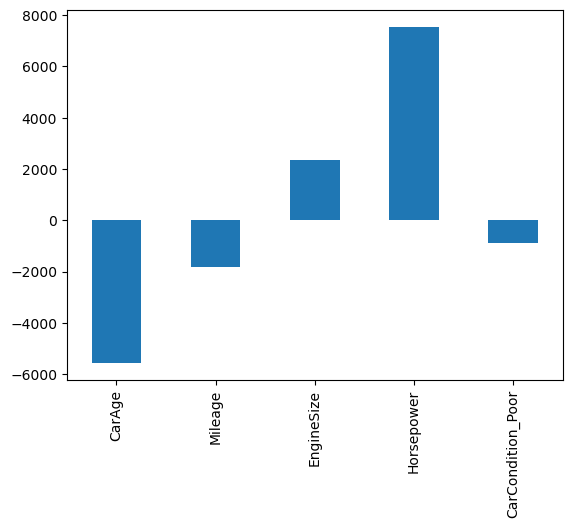

In [87]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [88]:
model.intercept_

52215.67751340222

## Prediction

In [89]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

## Evaluation

In [90]:
def evaluate(actual, pred, source):
    print(source)
    print('MSE')
    print(mean_squared_error(actual, pred))
    print('RMSE')
    print(np.sqrt(mean_squared_error(actual, pred)))
    print('MAPE')
    print(mean_absolute_percentage_error(actual, pred))
    print('R2 score')
    print(r2_score(actual, pred))
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), mean_absolute_percentage_error(actual, pred), r2_score(actual, pred)]

In [91]:
train_result = evaluate(Y_train, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(Y_test, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
35582906.45050638
RMSE
5965.1409413781985
MAPE
0.09696350543786292
R2 score
0.7279431896714703
TEST DATA RESULT
MSE
35189096.31718532
RMSE
5932.039810822692
MAPE
0.09486280671413107
R2 score
0.7345118799220363


In [92]:
train_result

[35582906.45050638,
 5965.1409413781985,
 0.09696350543786292,
 0.7279431896714703]

In [93]:
test_result

[35189096.31718532, 5932.039810822692, 0.09486280671413107, 0.7345118799220363]

In [94]:
res = [train_result] + [test_result]

In [95]:
res

[[35582906.45050638,
  5965.1409413781985,
  0.09696350543786292,
  0.7279431896714703],
 [35189096.31718532,
  5932.039810822692,
  0.09486280671413107,
  0.7345118799220363]]

In [96]:
pd.DataFrame(res, columns = [ 'MSE','RMSE','MAPE','R2 Score'], index = ['Train', 'Test'])

,MSE,RMSE,MAPE,R2 Score
Train,35582906.45,5965.14,0.10,0.73
Test,35189096.32,5932.04,0.09,0.73
